In [87]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)


In [88]:
print("Loading models...")
with open('models/model_naive_bayes.pkl', 'rb') as f:
    nb_model = pickle.load(f)

with open('models/model_knn.pkl', 'rb') as f:
    knn_model = pickle.load(f)

with open('models/model_decision_tree.pkl', 'rb') as f:
    dt_model = pickle.load(f)

with open('models/vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

print("All models loaded!")

Loading models...
All models loaded!


In [89]:
#load data
df = pd.read_csv('instagram_comments_cleaned.csv')
X = vectorizer.transform(df['cleaned_text'])
y = df['Sentiment'].map({'negative': 0, 'positive': 1})

In [90]:
#split data kaya pas training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [91]:
print("Making predictions...")
models = {
    'Naive Bayes': nb_model,
    'k-NN': knn_model,
    'Decision Tree': dt_model
}

Making predictions...


In [92]:
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    results[name] = {
        'y_pred': y_pred,
        'y_prob': y_prob,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"\n{name}:")
    print(f"   Accuracy:  {results[name]['accuracy']:.4f}")
    print(f"   Precision: {results[name]['precision']:.4f}")
    print(f"   Recall:    {results[name]['recall']:.4f}")
    print(f"   F1-Score:  {results[name]['f1']:.4f}")


Naive Bayes:
   Accuracy:  0.9000
   Precision: 0.9000
   Recall:    0.9000
   F1-Score:  0.9000

k-NN:
   Accuracy:  0.8625
   Precision: 0.8683
   Recall:    0.8625
   F1-Score:  0.8620

Decision Tree:
   Accuracy:  0.7375
   Precision: 0.7655
   Recall:    0.7375
   F1-Score:  0.7304


In [93]:
#dataframe untuk perbandingan
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()]
})


COMPARATIVE MODEL PERFORMANCE
        Model  Accuracy  Precision  Recall  F1-Score
  Naive Bayes    0.9000   0.900000  0.9000  0.900000
         k-NN    0.8625   0.868254  0.8625  0.861961
Decision Tree    0.7375   0.765549  0.7375  0.730380
Accuracy values: [0.9    0.8625 0.7375]
Precision values: [0.9        0.86825397 0.76554857]
Recall values: [0.9    0.8625 0.7375]
F1-Score values: [0.9        0.86196078 0.73038036]


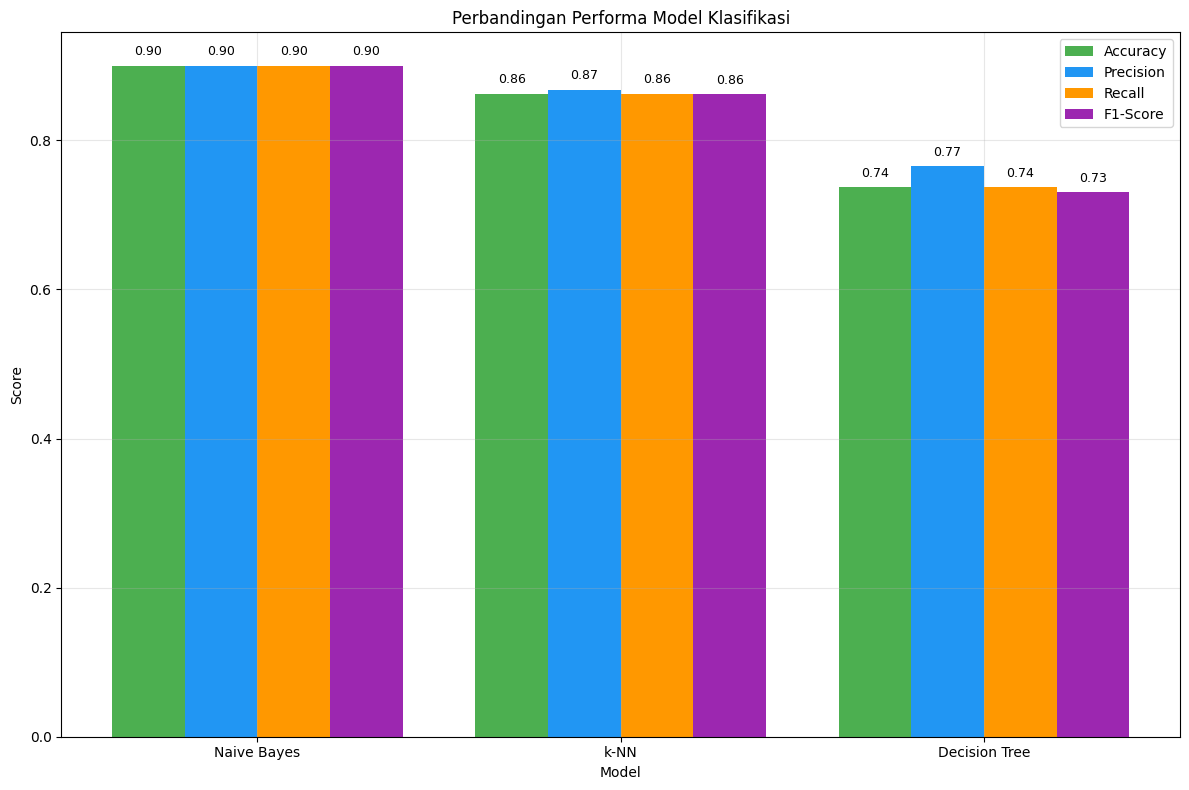

In [94]:
print("\n" + "="*60)
print("COMPARATIVE MODEL PERFORMANCE")
print("="*60)
print(comparison_df.to_string(index=False))

# Visualisasi perbandingan
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(models))
width = 0.2

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']

for i, metric in enumerate(metrics):
    values = comparison_df[metric].values
    print(f"{metric} values: {values}")
    ax.bar(x + i*width - 1.5*width, values, width, label=metric, color=colors[i])

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Performa Model Klasifikasi')
ax.set_xticks(x)
ax.set_xticklabels(list(models.keys()))
ax.legend()
ax.values = [round(v, 2) for v in comparison_df[metric].values for metric in metrics]
for i in range(len(models)):
    for j in range(len(metrics)):
        ax.text(i + j*width - 1.5*width, comparison_df[metrics[j]][i] + 0.01,
                f"{comparison_df[metrics[j]][i]:.2f}", ha='center', va='bottom', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualisasi/model_comparison.png', dpi=300)
plt.show()


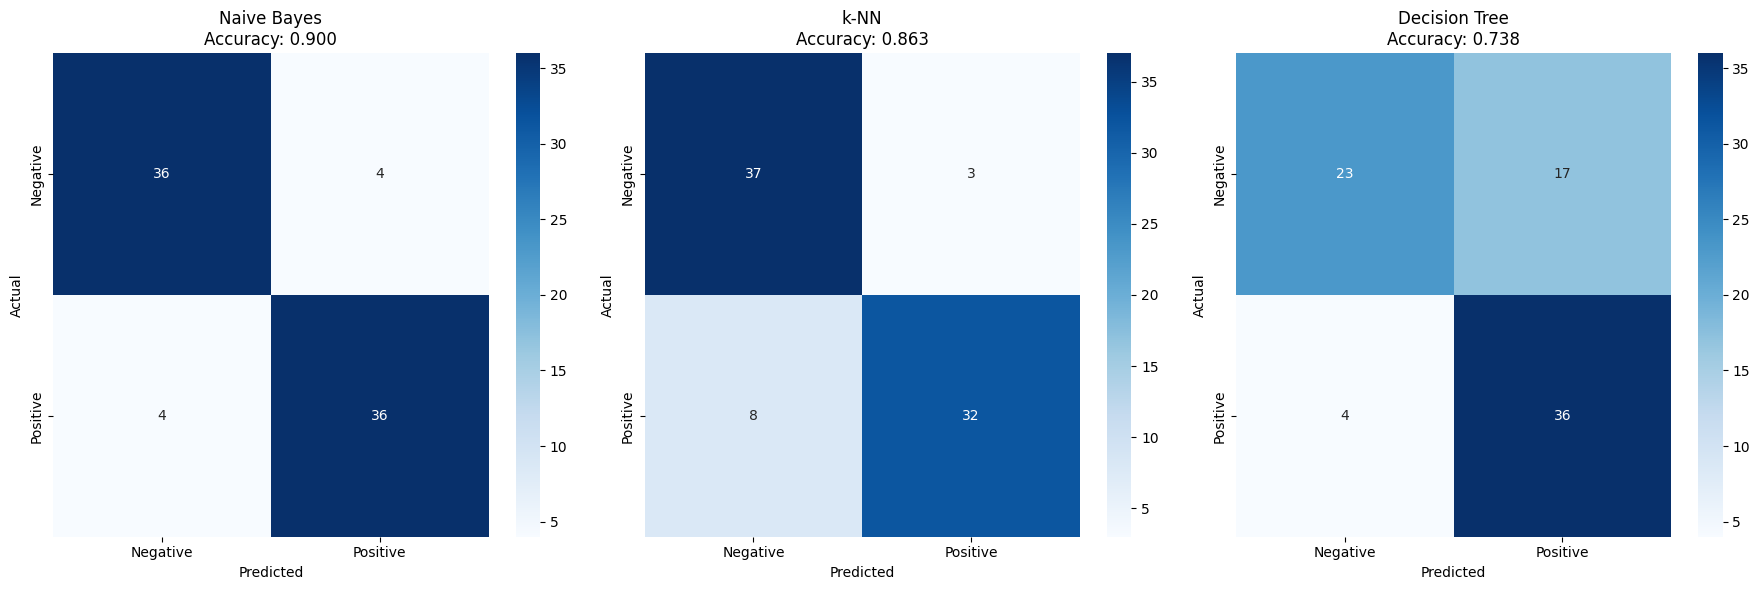

In [95]:
#confusion metrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                ax=axes[idx])
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('visualisasi/confusion_matrix.png', dpi=300)
plt.show()

In [96]:
#klasifikasi 
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORTS")
print("="*60)

for name, result in results.items():
    print(f"\{name}:")
    print("-" * 40)
    print(classification_report(y_test, result['y_pred'], 
                                target_names=['Negative', 'Positive']))


DETAILED CLASSIFICATION REPORTS
\Naive Bayes:
----------------------------------------
              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90        40
    Positive       0.90      0.90      0.90        40

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80

\k-NN:
----------------------------------------
              precision    recall  f1-score   support

    Negative       0.82      0.93      0.87        40
    Positive       0.91      0.80      0.85        40

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80

\Decision Tree:
----------------------------------------
              precision    recall  f1-score   support

    Negative       0.85      0.57      0.69        40
    Positive       0.68      0.90      0.77 

In [97]:
#feature importance dari Decision Tree
feature_names = vectorizer.get_feature_names_out()
importances = dt_model.feature_importances_

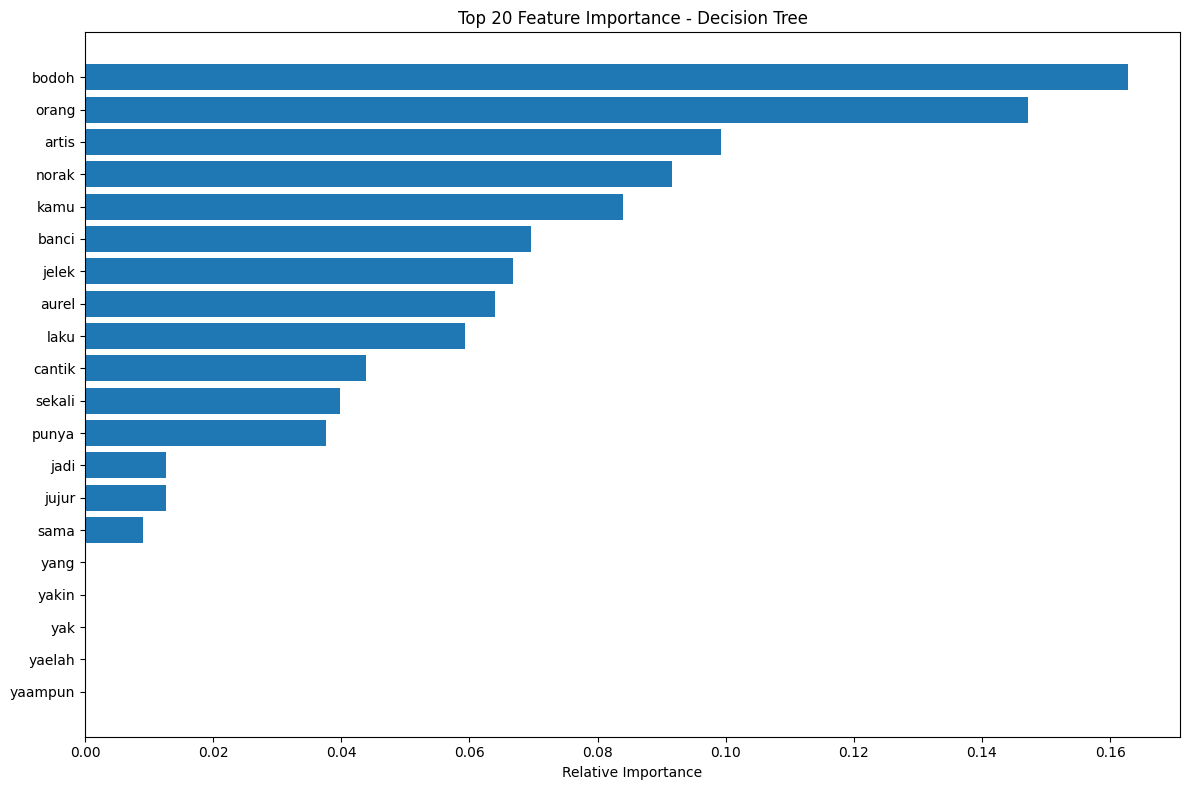

In [98]:
# Ambil top 20 feature importance
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(12, 8))
plt.title('Top 20 Feature Importance - Decision Tree')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.savefig('visualisasi/feature_importance_dt.png', dpi=300)
plt.show()

In [99]:
print("TOP 10 FEATURES (Decision Tree):")
print("="*40)
for i in indices[-10:][::-1]:
    print(f"{feature_names[i]:20} → {importances[i]:.4f}")

TOP 10 FEATURES (Decision Tree):
bodoh                → 0.1628
orang                → 0.1471
artis                → 0.0993
norak                → 0.0916
kamu                 → 0.0840
banci                → 0.0696
jelek                → 0.0668
aurel                → 0.0640
laku                 → 0.0593
cantik               → 0.0438


In [100]:
# Analisis kesalahan prediksi
print("\n" + "="*60)
print("ERROR ANALYSIS")
print("="*60)

# Dapatkan indeks data test
test_indices = y_test.index
df_test = df.loc[test_indices].copy()

# Tambahkan prediksi semua model
for name, result in results.items():
    df_test[f'pred_{name.lower().replace(" ", "_")}'] = result['y_pred']
    df_test[f'pred_{name.lower().replace(" ", "_")}_label'] = df_test[f'pred_{name.lower().replace(" ", "_")}'].map({0: 'negative', 1: 'positive'})

# Cari komentar yang salah diprediksi oleh SEMUA model
all_wrong = df_test[
    (df_test['Sentiment'] != df_test['pred_naive_bayes_label']) &
    (df_test['Sentiment'] != df_test['pred_k-nn_label']) &
    (df_test['Sentiment'] != df_test['pred_decision_tree_label'])
]

print(f"\nKomentar yang salah oleh SEMUA model: {len(all_wrong)}")
if len(all_wrong) > 0:
    print("\nContoh komentar sulit:")
    for idx, row in all_wrong.head(5).iterrows():
        print(f"\n: {row['Instagram Comment Text'][:100]}...")
        print(f"   Sentimen asli: {row['Sentiment']}")
        print(f"   NB: {row['pred_naive_bayes_label']} | k-NN: {row['pred_k-nn_label']} | DT: {row['pred_decision_tree_label']}")

# Cari komentar yang benar oleh SEMUA model
all_correct = df_test[
    (df_test['Sentiment'] == df_test['pred_naive_bayes_label']) &
    (df_test['Sentiment'] == df_test['pred_k-nn_label']) &
    (df_test['Sentiment'] == df_test['pred_decision_tree_label'])
]

print(f"\nKomentar yang benar oleh SEMUA model: {len(all_correct)}")


ERROR ANALYSIS

Komentar yang salah oleh SEMUA model: 2

Contoh komentar sulit:

: Beruntungnya Bella.. Orang2 jadi fokus ama komen lakinya. Coba kalo ngga, pasti model bajunya yang d...
   Sentimen asli: positive
   NB: negative | k-NN: negative | DT: negative

:  <USERNAME> yutub apaan ya mba? Aplikasi baru ya? Sy taunya youtube. Mba gak tau apa ya seseorg bs d...
   Sentimen asli: negative
   NB: positive | k-NN: positive | DT: positive

Komentar yang benar oleh SEMUA model: 48


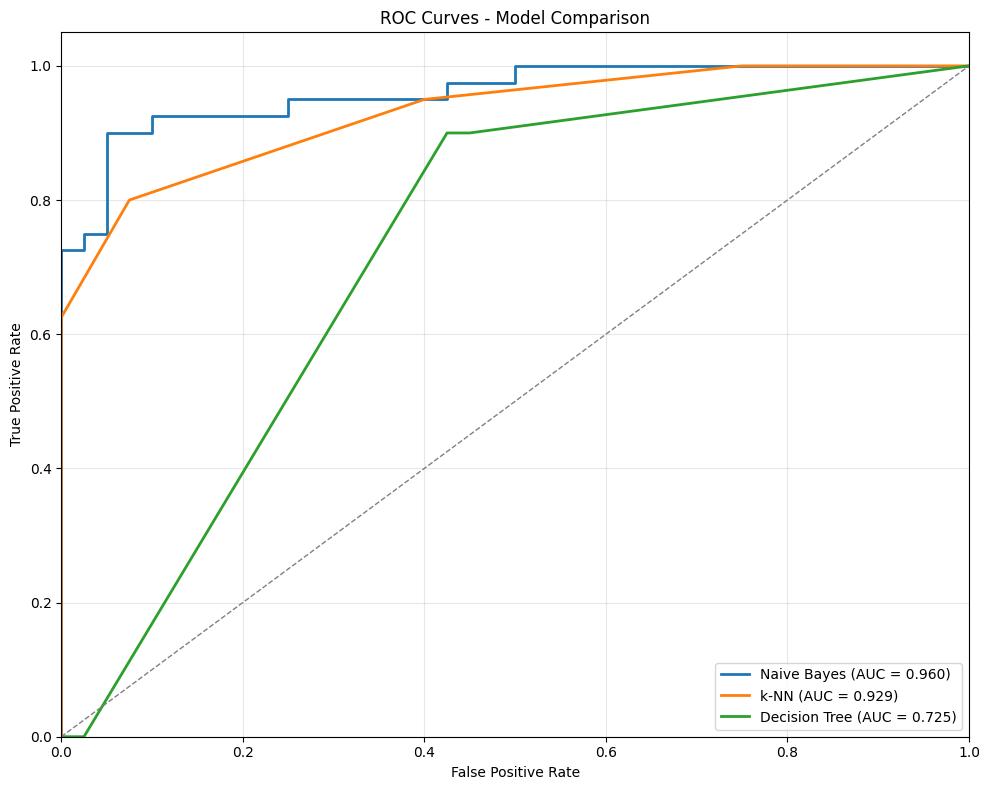

In [101]:
#plot ROC curves untuk model yang punya predict_proba
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['y_prob'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, 
                 label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualisasi/roc_curves.png', dpi=300)
plt.show()

In [102]:
#kesimpulannya
print("\n" + "="*60)
print("FINAL CONCLUSIONS")
print("="*60)

# Model terbaik berdasarkan accuracy
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])

print(f"\nBEST MODEL: {best_model[0]}")
print(f"   Accuracy: {best_model[1]['accuracy']:.4f}")
print(f"   F1-Score: {best_model[1]['f1']:.4f}")

print("\nPERFORMANCE RANKING:")
print("-" * 40)
sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
for rank, (name, metrics) in enumerate(sorted_results, 1):
    print(f"{rank}. {name:15} → Accuracy: {metrics['accuracy']:.4f}")

print("\nRECOMMENDATIONS:")
print("-" * 40)
print("1. Naive Bayes: Terbaik untuk teks pendek & cepat")
print("2. k-NN: Baik untuk similarity matching")
print("3. Decision Tree: Mudah diinterpretasi (feature importance)")


FINAL CONCLUSIONS

BEST MODEL: Naive Bayes
   Accuracy: 0.9000
   F1-Score: 0.9000

PERFORMANCE RANKING:
----------------------------------------
1. Naive Bayes     → Accuracy: 0.9000
2. k-NN            → Accuracy: 0.8625
3. Decision Tree   → Accuracy: 0.7375

RECOMMENDATIONS:
----------------------------------------
1. Naive Bayes: Terbaik untuk teks pendek & cepat
2. k-NN: Baik untuk similarity matching
3. Decision Tree: Mudah diinterpretasi (feature importance)


In [103]:
# Save evaluation results
eval_results = {
    'comparison_df': comparison_df,
    'results': results,
    'best_model': best_model[0]
}

with open('models/hasil_evaluasi.pkl', 'wb') as f:
    pickle.dump(eval_results, f)